# <center>___________________________________________________________</center>

# <center>REGRESSION EXAMPLES FOR THE CO2 EMISSIONS OF CARS</center>

# <center>___________________________________________________________</center>

## Introduction
***

In this project, we will develop simple and multiple linear regression models to predict the CO2 emission of a car with its properties given. We will download a fuel consumption dataset, **`FuelConsumptionCo2.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. The dataset can be found [here](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

## Dataset
***

Each row of the data consists of 13 features:

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL TYPE** e.g. Z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **FUEL CONSUMPTION COMB MPG(mpg)** e.g. 33
*   **CO2 EMISSIONS (g/km)** e.g. 182


## Libraries
***

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install pylab
#!pip install sklearn
#!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

# <center>___________________________________________________________</center>

# <center>DATA ACQUISATION</center>
***

In [2]:
df = pd.read_csv("https://github.com/efeyemez/Portfolio/raw/main/Datasets/FuelConsumptionCo2.csv")

print(df.shape)
df.head(3)

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


## Missing Data
***

In [3]:
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")   

MODELYEAR
False    1067
Name: MODELYEAR, dtype: int64

MAKE
False    1067
Name: MAKE, dtype: int64

MODEL
False    1067
Name: MODEL, dtype: int64

VEHICLECLASS
False    1067
Name: VEHICLECLASS, dtype: int64

ENGINESIZE
False    1067
Name: ENGINESIZE, dtype: int64

CYLINDERS
False    1067
Name: CYLINDERS, dtype: int64

TRANSMISSION
False    1067
Name: TRANSMISSION, dtype: int64

FUELTYPE
False    1067
Name: FUELTYPE, dtype: int64

FUELCONSUMPTION_CITY
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

FUELCONSUMPTION_HWY
False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

FUELCONSUMPTION_COMB
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

FUELCONSUMPTION_COMB_MPG
False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

CO2EMISSIONS
False    1067
Name: CO2EMISSIONS, dtype: int64



There are no missing values in the data set.

# <center>___________________________________________________________</center>

# <center>BRIEF DATA EXPLORATION</center>
***

We will first have a descriptive exploration on our data:

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Some candidate features to explore more:

In [5]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


We can plot the distributions of each of these features:

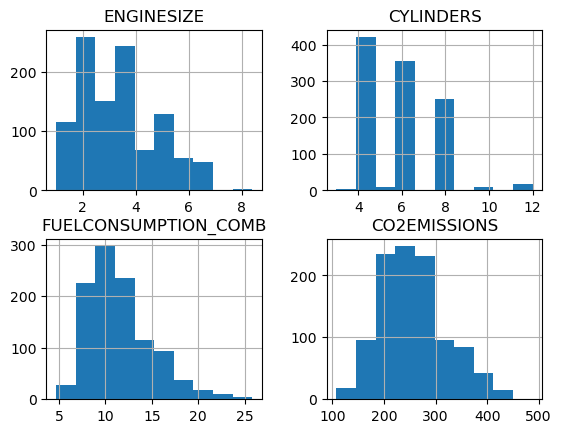

In [6]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


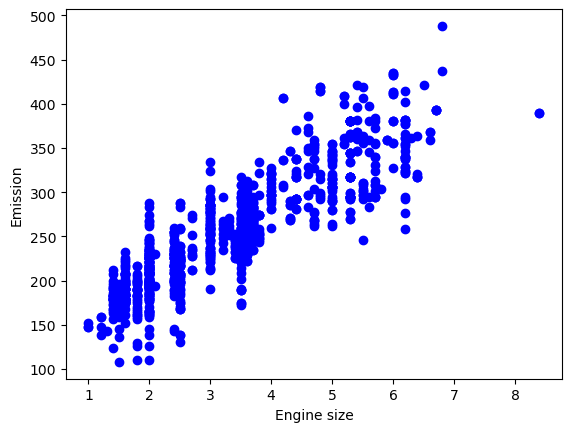

In [7]:
plt.scatter(df[['ENGINESIZE']], df[['CO2EMISSIONS']],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

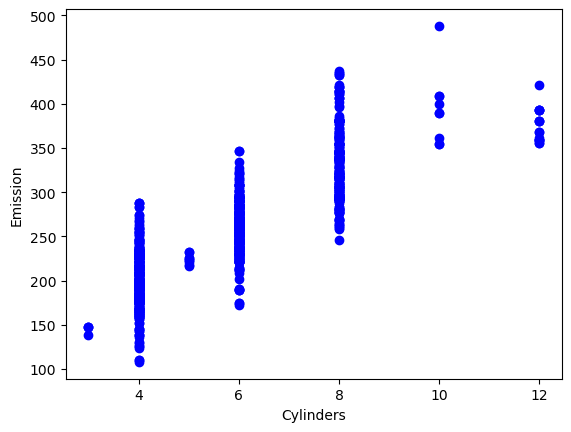

In [8]:
# write your code here
plt.scatter(df[['CYLINDERS']], df[['CO2EMISSIONS']],  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

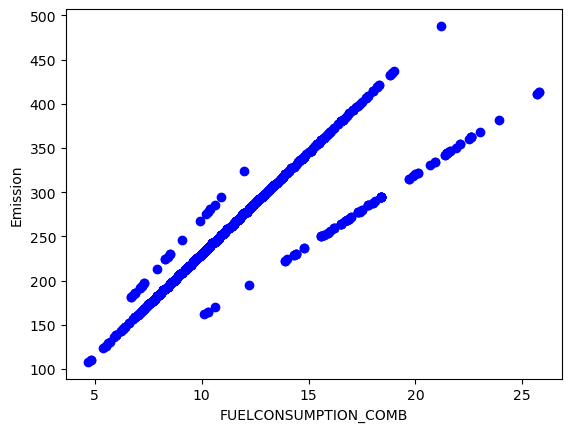

In [9]:
plt.scatter(df[['FUELCONSUMPTION_COMB']], df[['CO2EMISSIONS']],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# <center>___________________________________________________________</center>

# <center>MODEL DEVELOPMENT</center>
***

## Creating Train and Test Dataset
***

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [10]:
y_data = df[['CO2EMISSIONS']]
x_data = df.drop('CO2EMISSIONS',axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

### Train data distribution


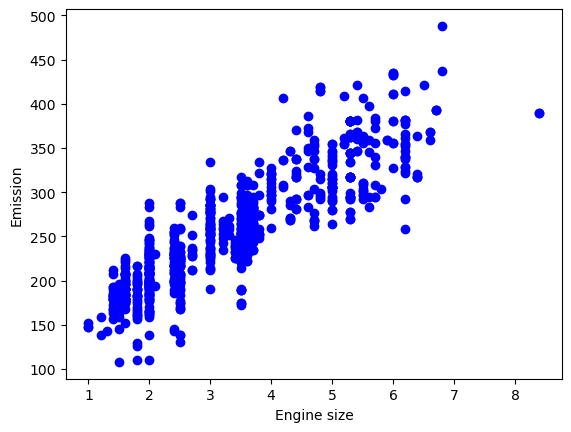

In [12]:
plt.scatter(x_train[["ENGINESIZE"]], y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Simple Linear Regression Models
***

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

## Model 1

Using sklearn package to model data:

In [13]:
lm = LinearRegression()
lm.fit(x_train[["ENGINESIZE"]], y_train)

# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[39.4153746]]
Intercept:  [124.77059523]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.

We can plot the fit line over the training data:


Text(0, 0.5, 'Emission')

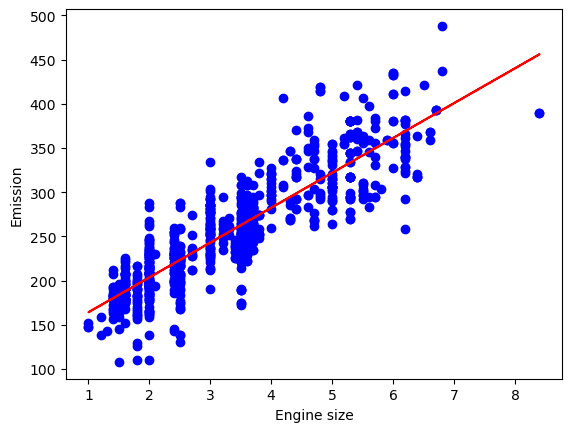

In [14]:
plt.scatter(x_train[["ENGINESIZE"]], y_train,  color='blue')
plt.plot(x_train[["ENGINESIZE"]], lm.coef_[0][0]*x_train[["ENGINESIZE"]] + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE and MAE here to calculate the accuracy of our model based on the test set:

*   **Mean Absolute Error:** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   **Mean Squared Error (MSE):** Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   **R-squared** is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


Now we will predict the data and evaluate our model on the test data:

In [15]:
yhat_test = lm.predict(x_test[["ENGINESIZE"]])

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, yhat_test))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, yhat_test))
print("R2-score: %.2f" % r2_score(y_test, yhat_test) )

Mean absolute error: 23.21
Residual sum of squares (MSE): 955.37
R2-score: 0.76


We can plot the fit line over the test data:

Text(0, 0.5, 'Emission')

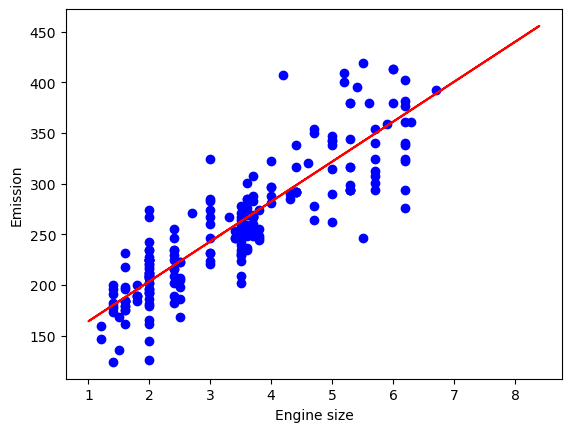

In [16]:
plt.scatter(x_test[["ENGINESIZE"]], y_test,  color='blue')
plt.plot(x_train[["ENGINESIZE"]], lm.coef_[0][0]*x_train[["ENGINESIZE"]] + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model 2

Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature:

In [17]:
lm = LinearRegression()
lm.fit(x_train[["FUELCONSUMPTION_COMB"]], y_train)

# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[16.33711954]]
Intercept:  [67.21269924]


### Evaluation

In [18]:
yhat_test = lm.predict(x_test[["FUELCONSUMPTION_COMB"]])

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, yhat_test))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, yhat_test))
print("R2-score: %.2f" % r2_score(y_test, yhat_test))

Mean absolute error: 20.50
Residual sum of squares (MSE): 857.80
R2-score: 0.79


We can see that the MAE is much better when we train using `FUELCONSUMPTION_COMB` rather than `ENGINESIZE`. We can observe the superiority of Model 2 with the plot of the fit line over the test data:

Text(0, 0.5, 'Emission')

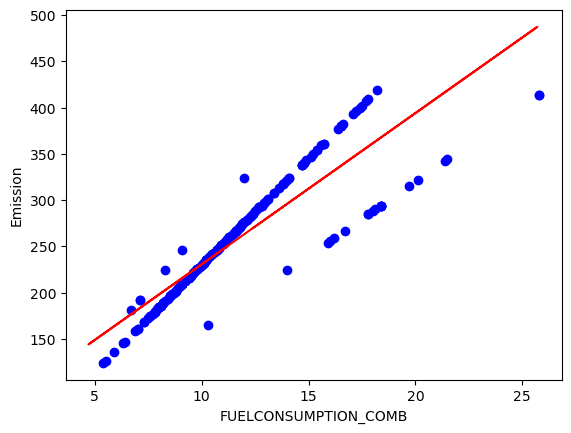

In [19]:
plt.scatter(x_test[["FUELCONSUMPTION_COMB"]], y_test,  color='blue')
plt.plot(x_train[["FUELCONSUMPTION_COMB"]], lm.coef_[0][0]*x_train[["FUELCONSUMPTION_COMB"]] + lm.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

# Multiple Linear Regression Models
***

In reality, there are multiple variables that impact the CO2 emission. When more than one independent variable is present, the process is called multiple linear regression.

## Model 1

An example of multiple linear regression would be predicting co2emission using the features FUELCONSUMPTION_COMB, ENGINESIZE and CYLINDERS of cars.

In [20]:
lm = LinearRegression()
lm.fit (x_train[["ENGINESIZE",'CYLINDERS','FUELCONSUMPTION_COMB']], y_train)

# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ', lm.intercept_)

Coefficients:  [[11.56295409  6.91231122  9.72527271]]
Intercept:  [65.17950048]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


### Evaluation

In [21]:
yhat_test= lm.predict(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, yhat_test))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, yhat_test))
print("R2-score: %.2f" % r2_score(y_test, yhat_test))

# Explained variance score: 1 is perfect prediction (r2 by default, no need for y_hat, does it automatically)
print('Variance score: %.2f' % lm.score(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], y_test))

Mean absolute error: 16.65
Residual sum of squares (MSE): 546.26
R2-score: 0.87
Variance score: 0.87


**Explained variance regression score:**

Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.


## Model 2

We will try to use a multiple linear regression with the same dataset, but this time with FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB.

In [22]:
lm = LinearRegression()
lm.fit (x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']], y_train)

# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ', lm.intercept_)

Coefficients:  [[11.67888674  6.33471426  6.7384351   2.56598033]]
Intercept:  [66.87437418]


### Evaluation

In [23]:
yhat_test= lm.predict(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, yhat_test))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, yhat_test))
print("R2-score: %.2f" % r2_score(y_test, yhat_test))

# Explained variance score: 1 is perfect prediction (r2 by default, no need for y_hat, does it automatically)
print('Variance score: %.2f' % lm.score(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']], y_test))

Mean absolute error: 16.70
Residual sum of squares (MSE): 552.02
R2-score: 0.86
Variance score: 0.86


We can see that the results are almost the same for the both MLR models.

# <center>___________________________________________________________</center>